## Data Modeling and Evaluation Steps

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Step 1: Retake the *X* and *y* variables from our trainning set

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the trainning dataset
# train_medication_reviews = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/Sentiment-Analysis-of-Medication-Reviews-Project/medication_reviews_dataset_to_train.csv', sep=',')
train_medication_reviews = pd.read_csv('/Users/rafaelaqueiroz/Sentiment-Analysis-of-Medication-Reviews-Project/medication_reviews_dataset_to_train.csv', sep=',')
train_medication_reviews

,drugName,condition,rating,date,usefulCount,year,review_word_lemm,polarity,rating_classification
0,Valsartan,Left Ventricular Dysfunction,9.0,2012-05-20,27,2012,"['no', 'side', 'effect', 'take', 'combination'...",0.000000,2
1,Guanfacine,ADHD,8.0,2010-04-27,192,2010,"['son', 'halfway', 'fourth', 'week', 'intuniv'...",0.188021,2
2,Lybrel,Birth Control,5.0,2009-12-14,17,2009,"['used', 'take', 'another', 'oral', 'contracep...",0.113636,1
3,Ortho Evra,Birth Control,8.0,2015-11-03,10,2015,"['first', 'time', 'using', 'form', 'birth', 'c...",0.262500,2
4,Buprenorphine / naloxone,Opiate Dependence,9.0,2016-11-27,37,2016,"['suboxone', 'completely', 'turned', 'life', '...",0.163333,2
...,...,...,...,...,...,...,...,...,...
112324,Carbamazepine,Trigeminal Neuralgia,1.0,2016-01-31,10,2016,"['mg', 'seems', 'work', 'every', 'nd', 'day', ...",0.000000,0
112325,Tekturna,High Blood Pressure,7.0,2010-02-07,18,2010,"['tekturna', 'day', 'effect', 'immediate', 'al...",-0.087500,2
112326,Campral,Alcohol Dependence,10.0,2015-05-31,125,2015,"['wrote', 'first', 'report', 'midoctober', 'no...",0.261905,2
112327,Thyroid desiccated,Underactive Thyroid,10.0,2015-09-19,79,2015,"['ive', 'thyroid', 'medication', 'year', 'spen...",0.201313,2


In [49]:
# As we already know from our previous notebook (notebook 3), our independent variable (X) is going to be the "review_word_lemm" variable
X_train = train_medication_reviews.review_word_lemm
X_train

0         ['no', 'side', 'effect', 'take', 'combination'...
1         ['son', 'halfway', 'fourth', 'week', 'intuniv'...
2         ['used', 'take', 'another', 'oral', 'contracep...
3         ['first', 'time', 'using', 'form', 'birth', 'c...
4         ['suboxone', 'completely', 'turned', 'life', '...
                                ...                        
112324    ['mg', 'seems', 'work', 'every', 'nd', 'day', ...
112325    ['tekturna', 'day', 'effect', 'immediate', 'al...
112326    ['wrote', 'first', 'report', 'midoctober', 'no...
112327    ['ive', 'thyroid', 'medication', 'year', 'spen...
112328    ['ive', 'chronic', 'constipation', 'adult', 'l...
Name: review_word_lemm, Length: 112329, dtype: object

In [4]:
X_train.shape

(112329,)

In [5]:
type(X_train)

pandas.core.series.Series

In [48]:
# As we know, our target or dependent variable (y) is going to be the 'rating_classification' variable
y_train = train_medication_reviews.rating_classification
y_train

0         2
1         2
2         1
3         2
4         2
         ..
112324    0
112325    2
112326    2
112327    2
112328    2
Name: rating_classification, Length: 112329, dtype: int64

In [7]:
y_train.shape

(112329,)

In [8]:
type(y_train)

pandas.core.series.Series

#### Step 2: Create the *X* and *y* variables from our testing set

Note: As this is the testing set, we are not going to apply any cleaning or processint to it. However, as we have done label encoding to the *rating* column, we would need to label encoding this column at this set as well since the model cannot predict the sentiment of the reviews from rating 1 to 10 as we are representing those numbers differently, such as: 0 - negative reviews, 1 - "neutral" reviews, and 2 - positive reviews.

In [9]:
# Load the test dataset
# test_drug_reviews_df = pd.read_csv('/content/drive/MyDrive/Data-Science-Other-Materials/Data-Scientist-Bootcamp/Sentiment-Analysis-of-Drug-Reviews/drugsComTest_raw.tsv', delimiter='\t')
test_drug_reviews_df = pd.read_csv('/Users/rafaelaqueiroz/Sentiment-Analysis-of-Medication-Reviews-Project/drugsComTest_raw.tsv', delimiter='\t')
test_drug_reviews_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [10]:
# Import library to label encode the rating column
from sklearn.preprocessing import LabelEncoder

# Define the bin edges and labels (0 = 'negative', 1 = 'neutral', 2 = 'positive')
bin_edges = [0, 4, 6, 10]  # Ratings 1-4 are negative, 5-6 are neutral, 7-10 are positive
bin_labels = ['negative', 'neutral', 'positive'] # The rating_classification column should now only have 0, 1, or 2 values

# Use cut to bin the "rating" column and create the new column called "rating_classification"
test_drug_reviews_df['rating_classification'] = pd.cut(test_drug_reviews_df['rating'], bins=bin_edges, labels=bin_labels)

# Instantiate LabelEncoder and fit_transform the new column
le = LabelEncoder()
test_drug_reviews_df['rating_classification'] = le.fit_transform(test_drug_reviews_df['rating_classification'])
test_drug_reviews_df.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,rating_classification
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,2
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,2
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,2
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,2
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,2


In [11]:
type(test_drug_reviews_df)

pandas.core.frame.DataFrame

In [12]:
test_drug_reviews_df.shape

(53766, 8)

In [47]:
X_test = test_drug_reviews_df['review']
X_test

0        "I&#039;ve tried a few antidepressants over th...
1        "My son has Crohn&#039;s disease and has done ...
2                            "Quick reduction of symptoms"
3        "Contrave combines drugs that were used for al...
4        "I have been on this birth control for one cyc...
                               ...                        
53761    "I have taken Tamoxifen for 5 years. Side effe...
53762    "I&#039;ve been taking Lexapro (escitaploprgra...
53763    "I&#039;m married, 34 years old and I have no ...
53764    "I was prescribed Nucynta for severe neck/shou...
53765                                        "It works!!!"
Name: review, Length: 53766, dtype: object

In [14]:
type(X_test)

pandas.core.series.Series

In [15]:
X_test.shape

(53766,)

In [46]:
y_test = test_drug_reviews_df.rating_classification
y_test

0        2
1        2
2        2
3        2
4        2
        ..
53761    2
53762    2
53763    2
53764    0
53765    2
Name: rating_classification, Length: 53766, dtype: int64

In [17]:
type(y_test)

pandas.core.series.Series

In [18]:
y_test.shape

(53766,)

#### Step 3: Create the pipeline with Word2vec

In [44]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from gensim.models import KeyedVectors

# Get the metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
from gensim.models import Word2Vec

# Load the Word2Vec model from file
model = Word2Vec.load('/Users/rafaelaqueiroz/Sentiment-Analysis-of-Medication-Reviews-Project/word2vec.model')

In [37]:
print(model)

Word2Vec(vocab=31, vector_size=3, alpha=0.025)


In [51]:
# # Load the pre-trained Word2Vec embeddings
# w2v_model = KeyedVectors.load_word2vec_format('/Users/rafaelaqueiroz/Sentiment-Analysis-of-Medication-Reviews-Project/word2vec.model', unicode_errors='ignore')

def w2v_transformer(docs):
    # Tokenize the documents
    tokenized_docs = [doc.split() for doc in docs]

    # Transform the documents to their corresponding embeddings
    embedded_docs = []
    for doc in tokenized_docs:
        embedded_doc = []
        for word in doc:
            if word in model:
                embedded_doc.append(model[word])
        embedded_docs.append(embedded_doc)

    # Calculate the average embedding for each document
    averaged_embedded_docs = []
    for doc in embedded_docs:
        if len(doc) > 0:
            averaged_embedded_docs.append(sum(doc) / len(doc))
        else:
            averaged_embedded_docs.append([0] * model.vector_size)

    return averaged_embedded_docs

In [55]:
# Fit the pipeline to the data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [56]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('word2vec', FunctionTransformer(w2v_transformer)),
    ('classifier', FunctionTransformer(lambda x: RandomForestClassifier(class_weight={0: 2, 1: 1, 2: 1}, random_state=42).fit(x, y_train).predict(x)))
])

pipeline.fit(X_train_tfidf, y_train)

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
print(confusion_mat)

AttributeError: split not found

In [19]:
# Get the metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test data
y_pred = ensemble_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63     13497
           1       0.17      0.25      0.20      4829
           2       0.80      0.81      0.81     35440

    accuracy                           0.70     53766
   macro avg       0.56      0.54      0.55     53766
weighted avg       0.72      0.70      0.71     53766

[[ 7757  1270  4470]
 [ 1081  1192  2556]
 [ 2116  4540 28784]]
0.7018003943012313


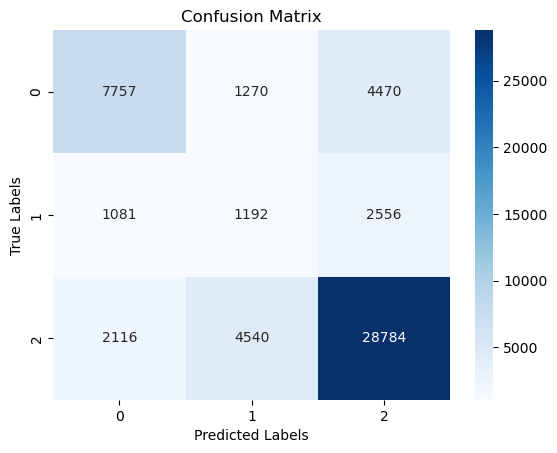

In [20]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Based on the classification report, it looks like the model performs relatively well for class 2 (positive reviews) with a precision of 0.80, recall of 0.81, and F1-score of 0.81. However, the model doesn't perform as well for class 1 (neutral reviews) with a low precision of 0.17 and F1-score of 0.20.

Looking at the macro-average of precision, recall, and F1-score, the model performs better in class 2 than classes 0 and 1. The weighted average of the metrics is also reported, which is more useful when the dataset is imbalanced.

The confusion matrix shows the count of true positives, false positives, true negatives, and false negatives for each class. The diagonal elements represent the correctly classified instances, while the off-diagonal elements represent misclassifications.

Finally, the accuracy score indicates the proportion of correctly classified instances out of the total number of instances. In this case, the model has an accuracy of 70.18%.

Based on these results, it seems that the class imbalance is still affecting the performance of the model, especially for the neutral class. Therefore, I might need to consider other approaches to handle class imbalance, such as oversampling or undersampling, or using different evaluation metrics such as AUC-ROC or precision-recall curve.

Now, let's perform some testing on the reviews.

In [21]:
X_test[1] # Positive

'"My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically."'

In [22]:
y_pred[1] # Right prediction

2

In [23]:
X_test[0] # Positive

'"I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me."'

In [24]:
y_pred[0] # Right prediction

2

In [25]:
X_test[10] # Negative

'"Holy Hell is exactly how I feel. I had been taking Brisdelle for 1.5 years. The hot flashes did indeed subside - however, the side affects of this medicine coupled with the fact Noven was acquired by YET another pharmaceutical company - YOU CAN&#039;T PLACE A REP IN THE AREA, DISTRIBUTE YOUR DRUGS, AND THEN FIRE HER-AND NOT REPLACE THEREFORE there is NO medicine or support here. You dumped this drug in the Dr&#039;s hands and walked away. After calling Sebula - you act like you don&#039;t even care. You have made it impossible to obtain this. I happen to think this is illegal.  I just decided to wean myself off this and Premarin. It has been nothing short of a nightmare. If you don&#039;t need this drug- DON&#039;T START. Seriously."'

In [26]:
y_pred[10] # Right prediction

0

In [27]:
X_test[20] # Between neutral and negative (more towards the 0)

'"If I could give it a 0, I would absolutely do so.  Started at 50mg, and felt WIRED.  Wanted to get up and clean the house!  Bumped it to 100mg, less wired, but still wide awake all night.  Bumped to 150, with the same lack of effect.  MD informed me after this dose it becomes less effective for sleep, so why even bother.  15 years of trying different sleep medications and alternatives, and this, I can say for sure, was the LEAST effective I have ever come across.  At it&#039;s low price point, feel free to give it a try, and maybe you will be luckier?  Everyone&#039;s sleep conditions are different.  But if you get hyper after benadryl, expect the same reaction to this drug."'

In [30]:
y_pred[20] # Wrong 

2

In [31]:
X_test[200] # Negative

'"Took levofloxin for pneumonia and cleared up quick. Within 2 months my achilles was sore everyday. Made an appointment with a podiatrist for Nov 17th. Achilles snapped on Nov 14th. Surgery went well to repair shredded achilles. In cast for 3 months. Since sore after 3 months on my feet and working. I nurse it everyday. Avoid this drug, if possible. Not worth the side effects."'

In [32]:
y_pred[200] # Wrong

2

In [33]:
X_test[3]

'"Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as any drug. I have been taking it for five days, and the good news is, it seems to go to work immediately. I feel hungry before I want food now. I really don&#039;t care to eat; it&#039;s just to fill my stomach. Since I have only been on it a few days, I don&#039;t know if I&#039;ve lost weight (I don&#039;t have a scale), but my clothes do feel a little looser, so maybe a pound or two. I&#039;m hoping that after a few months on this medication, I will develop healthier habits that I can continue without the aid of Contrave."'

In [34]:
y_test[3]

2

In [35]:
X_test[6] # Neutral

'"I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me"'

In [36]:
y_pred[6] # Right prediction

1

In [37]:
X_test[187] # Positive

'"I was prescribed valium for tension headaches. I have severe migraines and tension headaches. They could not find out exactly why I was having them, so we have to treat the symptom. Valium actually makes me able to function through some of the worst tension headaches. Before, I was spending so much time locked in a dark room between the migraines and tension headaches. I was missing my life and the lives of my children. It is really nice to be able to have a part in their lives and my own. I am thankful daily that I can rejoin the world again."'

In [38]:
y_pred[187] # Right

2

In [39]:
X_test[22] # Negative

'"After a few days and it &quot;kicked in,&quot; every noise in the house would make me jump, pictures on TV would feel as if they were 3-D and make me jump, and I literally felt like my skin was crawling, moving, and melding to things, such as blankets. My mind focused and keyed in on every piece of white noise there was and I had sweaty, night hot flashes with chills."'

In [40]:
y_pred[22] # Wrong

2

In [41]:
X_test[29] # Positive

'"I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. I have been taking 150mg of lamotrigine for over 2 years. Thus far I have experienced significant improvements in controlling my bipolar II disorder. I recently paired 100mg of sertraline to improve the lows. Also, I experience rapid cycling. I rated this drug 70% as I feel I still have a long way to go in recovery. But, the drug has definitely allowed me to be a highly functioning individual."'

In [42]:
y_pred[29] # Right

2

In [43]:
review_text_1 = "I did not like this pill"
predicted_rating = ensemble_model.predict([review_text_1])
print(predicted_rating)

[0]


In [44]:
review_text_2 = "I like this pill"
y_pred = ensemble_model.predict([review_text_2])
print(y_pred)

[2]


In [45]:
review_text_3 = "This pill is horrible"
y_pred = ensemble_model.predict([review_text_3])
print(y_pred)

[0]


In [46]:
review_text_4 = "I got sick and sad"
y_pred = ensemble_model.predict([review_text_4])
print(y_pred)

[0]


In [47]:
review_text_5 = "This patch is perfect"
y_pred = ensemble_model.predict([review_text_5])
print(y_pred)

[2]


#### Save the model to the disk

In [48]:
# Import pickle library
import pickle

# Save the trained model to a file
with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(ensemble_model, f)

In [116]:
# # Load the saved model from a file
# with open('nbc_model.pkl', 'rb') as f:
#     nbc = pickle.load(f)